In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
rain = os.listdir('/content/drive/MyDrive/test/RainCloud')
norm = os.listdir('/content/drive/MyDrive/test/Cloud')

print(str(len(rain)))
print(str(len(norm)))

100
100


In [7]:
image = cv2.imread(os.path.join('/content/drive/MyDrive/test/RainCloud',rain[0]))
image.shape

(206, 276, 3)

In [8]:
image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)

In [9]:
image.shape

(128, 128, 3)

In [10]:
image.max()

255

In [11]:
image.min()

0

In [12]:
image = image/255

In [13]:
image.max()

1.0

In [14]:
image.min()

0.0

In [15]:
X = []
Y = []

# **Rain = 1**

In [16]:
for i in rain:
  image = cv2.imread(os.path.join('/content/drive/MyDrive/test/RainCloud',i))
  image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
  image = image/255

  X.append(image)
  Y.append(1)

# **Norm = 0**

In [17]:
for i in norm:
  image = cv2.imread(os.path.join('/content/drive/MyDrive/test/Cloud',i))
  image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
  image = image/255

  X.append(image)
  Y.append(0)

In [18]:
X = np.array(X)
Y = np.array(Y)

In [19]:
X.shape

(200, 128, 128, 3)

In [20]:
Y.shape

(200,)

In [21]:
X.max()

1.0

In [22]:
X.min()

0.0

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

In [24]:
X_train.shape

(180, 128, 128, 3)

In [25]:
X_test.shape

(20, 128, 128, 3)

In [26]:
Y_train.shape

(180,)

In [27]:
Y_test.shape

(20,)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 conv2d_17 (Conv2D)          (None, 58, 58, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 29, 29, 32)        0         
 g2D)                                                 

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss',patience=5)

In [41]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,callbacks=[earlystop])

Epoch 1/100
6/6 [==============================] - 13s 2s/step - loss: 0.1357 - accuracy: 0.9556 - val_loss: 0.3556 - val_accuracy: 0.9000
Epoch 2/100
6/6 [==============================] - 13s 2s/step - loss: 0.0771 - accuracy: 0.9778 - val_loss: 0.3180 - val_accuracy: 0.9000
Epoch 3/100
6/6 [==============================] - 13s 2s/step - loss: 0.0398 - accuracy: 0.9944 - val_loss: 0.2112 - val_accuracy: 0.9000
Epoch 4/100
6/6 [==============================] - 12s 2s/step - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.1698 - val_accuracy: 0.9500
Epoch 5/100
6/6 [==============================] - 15s 2s/step - loss: 0.0358 - accuracy: 0.9944 - val_loss: 0.1594 - val_accuracy: 0.9000
Epoch 6/100
6/6 [==============================] - 11s 2s/step - loss: 0.0315 - accuracy: 0.9944 - val_loss: 0.1910 - val_accuracy: 0.9000
Epoch 7/100
6/6 [==============================] - 13s 2s/step - loss: 0.0358 - accuracy: 0.9944 - val_loss: 0.1930 - val_accuracy: 0.9500
Epoch 8/100
6/6 [==========

<Axes: >

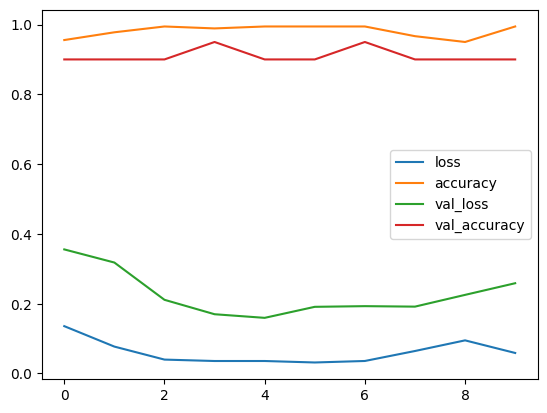

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [43]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 277ms/step - loss: 0.2587 - accuracy: 0.9000


[0.2586742043495178, 0.8999999761581421]

In [44]:
from sklearn.metrics import classification_report

In [45]:
Y_pred = np.round(model.predict(X_test))

print(classification_report(Y_test,Y_pred))

1/1 [==============================] - 0s 390ms/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [46]:
Y_pred = np.round(model.predict(X))

print(classification_report(Y,Y_pred))

7/7 [==============================] - 7s 945ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.99      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [47]:
model.save('/content/drive/MyDrive/ImageClassifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
